<a href="https://colab.research.google.com/github/prakashece/Deep_learning_algorithms/blob/master/LSTM_Multivariate_Energy_Harvesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Solar_mutivariate.csv')
print(df.shape)
#print(df)
train_data=df.iloc[1:385343,1:4].values
print(train_data)

(385440, 4)
[[   0.   1010.     97.94]
 [   0.   1010.     96.49]
 [   0.   1010.     96.47]
 ...
 [   0.   1000.     92.05]
 [   0.   1000.     98.82]
 [   0.   1000.     98.4 ]]


In [ ]:
train_x=[]
train_y=[]
for i in range(48,385342):
  train_x.append(train_data[i-48:i,0:train_data.shape[1]])
  train_y.append(train_data[i,0])
train_x,train_y=np.array(train_x),np.array(train_y)
#train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
print(train_x.shape)
print(train_y.shape)

(385294, 48, 3)
(385294,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
regressor=Sequential()

In [ ]:
regressor.add(LSTM(units=48,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor.add(Dropout(0.05))

In [ ]:
regressor.add(LSTM(units=48,return_sequences=True))
regressor.add(Dropout(0.05))

In [ ]:
regressor.add(LSTM(units=48,return_sequences=True))
regressor.add(Dropout(0.05))

In [ ]:
regressor.add(LSTM(units=48))
regressor.add(Dropout(0.05))

In [ ]:
regressor.add(Dense(units=1))


In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(train_x,train_y,epochs=5,batch_size=32)
print(regressor.loss)
#model.save('/content/drive/My Drive/solar_model.h5')
regressor.save('/content/drive/My Drive/solar_multivariate_model.h5')

Epoch 1/5
12041/12041 [==============================] - 561s 46ms/step - loss: 0.0820
Epoch 2/5
12041/12041 [==============================] - 556s 46ms/step - loss: 0.0460
Epoch 3/5
12041/12041 [==============================] - 555s 46ms/step - loss: 0.0429
Epoch 4/5
12041/12041 [==============================] - 557s 46ms/step - loss: 0.0414
Epoch 5/5
12041/12041 [==============================] - 555s 46ms/step - loss: 0.0411
mean_squared_error


In [ ]:
#regressor.save('/content/drive/My Drive/solar_model.h5')

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/My Drive/solar_multivariate_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 48, 48)            9984      
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 48, 48)            18624     
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 48, 48)            18624     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 48)               

In [ ]:
#test_data= df.iloc[385344:,1:2].values #for 96 values
#test_data= df.iloc[385439:,1:2].values #for 48 values
test_data= df.iloc[385344:385392,1:2].values #for middle 48 values
#data_test=pd.DataFrame(test_data)
#test_data= df.iloc[7248:7296,1:2].values #summer solar power(48 values)
data_test=pd.DataFrame(test_data)
print(len(data_test))

48


In [ ]:
data_total=df.iloc[:,1:4].values
data_total=pd.DataFrame(data_total)
print(data_total.shape)
#inputs=data_total[385392:].values
#inputs=data_total[380832:].values #for 96 values 
#inputs=data_total[383136:].values
inputs=data_total[385296:385392].values #for middle 48 values
print(inputs.shape)
test_x=[]

(385440, 3)
(96, 3)


In [ ]:
for i in range(48,96): # for midddle 48 values
  test_x.append(inputs[i-48:i,0:inputs.shape[1]])
#test_x.append(inputs)
test_x=np.array(test_x)
#test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],))
print(test_x.shape)
print(test_x)

(48, 48, 3)
[[[   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  ...
  [   0.   1000.     98.82]
  [   0.   1000.     98.4 ]
  [   0.   1000.     98.39]]

 [[   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  ...
  [   0.   1000.     98.4 ]
  [   0.   1000.     98.39]
  [   0.   1000.     97.98]]

 [[   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  [   0.   1000.    100.  ]
  ...
  [   0.   1000.     98.39]
  [   0.   1000.     97.98]
  [   0.   1000.    100.  ]]

 ...

 [[   0.   1000.     98.82]
  [   0.   1000.     98.4 ]
  [   0.   1000.     98.39]
  ...
  [   0.   1000.     98.29]
  [   0.   1000.     98.26]
  [   0.   1000.     97.92]]

 [[   0.   1000.     98.4 ]
  [   0.   1000.     98.39]
  [   0.   1000.     97.98]
  ...
  [   0.   1000.     98.26]
  [   0.   1000.     97.92]
  [   0.   1000.     97.91]]

 [[   0.   1000.     98.39]
  [   0.   1000.     97.98]
  [   0.   1000.    100.  ]
  ...
  [   0.   1

In [ ]:
predict_values=model.predict(test_x)
print(predict_values)

[[-1.3955235e-03]
 [-1.3470352e-03]
 [-1.2826324e-03]
 [-1.2468696e-03]
 [-1.3327897e-03]
 [-1.2807548e-03]
 [-1.2119710e-03]
 [-1.0821819e-03]
 [-9.0381503e-04]
 [-6.7850947e-04]
 [-4.2957067e-04]
 [ 1.4129281e-04]
 [-7.0843101e-04]
 [ 1.5711784e-04]
 [-7.4958801e-04]
 [ 7.2709918e-03]
 [ 2.7357399e-02]
 [ 5.6839705e-02]
 [ 1.7779317e-01]
 [ 2.6034158e-01]
 [ 2.6508909e-01]
 [ 2.5721014e-01]
 [ 5.1199400e-01]
 [ 7.5574458e-01]
 [ 1.0145780e+00]
 [ 1.1927943e+00]
 [ 1.1234090e+00]
 [ 9.8598659e-01]
 [ 7.4168491e-01]
 [ 6.5655994e-01]
 [ 5.2617085e-01]
 [ 3.1833109e-01]
 [ 2.6047999e-01]
 [ 1.4388609e-01]
 [ 4.1125029e-02]
 [-2.0914078e-03]
 [-1.0207504e-02]
 [-9.4198883e-03]
 [-8.5489154e-03]
 [-6.3061416e-03]
 [-5.5218339e-03]
 [-4.7421157e-03]
 [-4.2544901e-03]
 [-3.9084256e-03]
 [-3.6236942e-03]
 [-3.3647716e-03]
 [-3.1715930e-03]
 [-2.9893816e-03]]


The values for prediction is 48 values from test data. The test data has 96 values in total, From that i have used first 96 values for predicting the next 48 sequence.

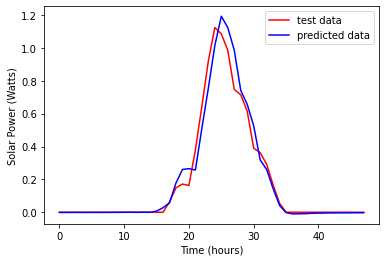

In [ ]:
plt.plot(data_test,color='red',label='test data')
plt.plot(predict_values,color='blue',label='predicted data')
plt.legend()
plt.xlabel("Time (hours)")
plt.ylabel("Solar Power (Watts)")
plt.show()

In [ ]:
x=np.array(predict_values*1000)
print(x.shape)
#print("Predicted solar power in mW for next 30 minutes",x)
time_val=[]
limit_val=[]
battery_voltage=3.7
battery_current=0.050
Energy=battery_voltage*battery_current*1000
print("Energy from battery in mWH",Energy)
power_req_1=50
power_req_2=25
power_req_3=10
print("Max Power required in mW",power_req_1)
battery_time_1=Energy/power_req_1*60
battery_time_2=Energy/power_req_2*60
battery_time_3=Energy/power_req_3*60
print("Battery life time in minutes",battery_time_1)


(48, 1)
Energy from battery in mWH 185.00000000000003
Max Power required in mW 50
Battery life time in minutes 222.00000000000003


0
1


TypeError: ignored

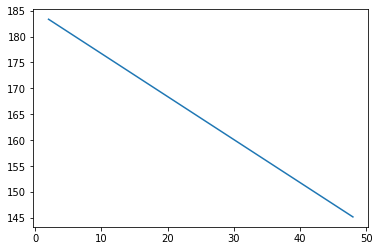

In [ ]:
limit_val=[]
time_val=[]
limit_val_2=[]
time_val_2=[]
Energy=185
Energy1=185
dec=0.83
for i in range(1,222):
  time_val_2.append(i)
  Energy1=Energy1-0.83
  limit_val_2.append(Energy1)
plt.plot(time_val_2[1:48],limit_val_2[1:48])
##########################
for i in range(0,47):
  print(i)
  time_val.append(i)
  if(i==0):
    limit_val= 185-0.83
  else:
    limit_val[i]= limit_val[i-1]-dec
'''
  limit_val[i]+=x[i]
  if limit_val[i]>185:
    limit_val[i].append(185.0)
  else:
    limit_val[i].append(limit_val[i])
'''
   #print(limit_val[i])
plt.plot(time_val,limit_val)
plt.show()

(48, 1)
solar_val [[  5.476594]
 [106.784584]
 [184.95525 ]
 [272.0708  ]
 [297.67822 ]
 [297.05722 ]
 [474.33115 ]]
[160, 135, 110, 85, 60, 35, 10]
160


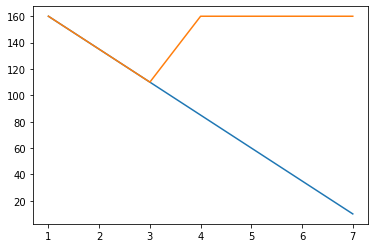

In [ ]:
#battery time in 30 minutes range 
print(x.shape)
print('solar_val',x[16:23])
limit_val_1=[]
time_val_1=[]
Energy=185
for i in range(1,8):
  time_val_1.append(i)
  Energy=Energy-25
  limit_val_1.append(Energy)
print(limit_val_1)
plt.plot(time_val_1,limit_val_1)
for i in range(1,7):
  if x[i+16]>185 and limit_val_1[i]<185:
    limit_val_1[i]+=25*i
    if limit_val_1[i]>185:
      limit_val_1[i]=185.0
print(limit_val_1[6])
plt.plot(time_val_1,limit_val_1)     
plt.show() 


I used battery energy = 185mwh and consumption value as 50mw. 
Formula used = E/P = 185/50= 3.7 (222.0 minutes).
So the battery can withstand for 222 minutes to provide 50mw.
for every minute the energy loss would be 0.83w using 185/222 value.
Graph-1: shows energy drop vs time.
Graph-2: energy recharge w r to solar power vs time